In [36]:
#Importing packages

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import sys
import os
import numpy as np
import pylab as pl
%pylab inline
import scipy.stats
import matplotlib.lines as mlines

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
#Loading URL

url = "http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

In [5]:
#Creating dictionaries for males and females and populating them with the data segmented by race

allmales={}
allfemales={}

allmales['all'] = pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white'] = pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black'] = pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic'] = pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian'] = pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all'] = pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white'] = pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black'] = pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic'] = pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian'] = pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [6]:
allfemales['all']

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.65,0.0162
5,..Farm Self-Employment,774,592,57,0,21,18,4,4,0,...,0,0,0,15,1635,65,7908,2005,0.916,0.0148
6,Social Security,26923,770,1294,2750,5261,5022,4252,2990,1924,...,0,0,0,0,11686,70,12453,71,0.258,0.0025
7,SSI (Supplemental Security Income),3386,515,559,363,1428,232,130,72,30,...,0,0,0,0,7950,71,7316,129,0.315,0.0088
8,Public Assistance,1541,759,409,257,74,9,17,5,3,...,0,0,0,0,2569,180,3413,149,0.464,0.0139
9,Veterans Benefits,619,79,58,48,68,56,113,49,31,...,0,0,6,0,12501,760,13839,927,0.42,0.0288


In [7]:
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [8]:
#Removing non-real entries for males

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
#Removing non-real entries for females

for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


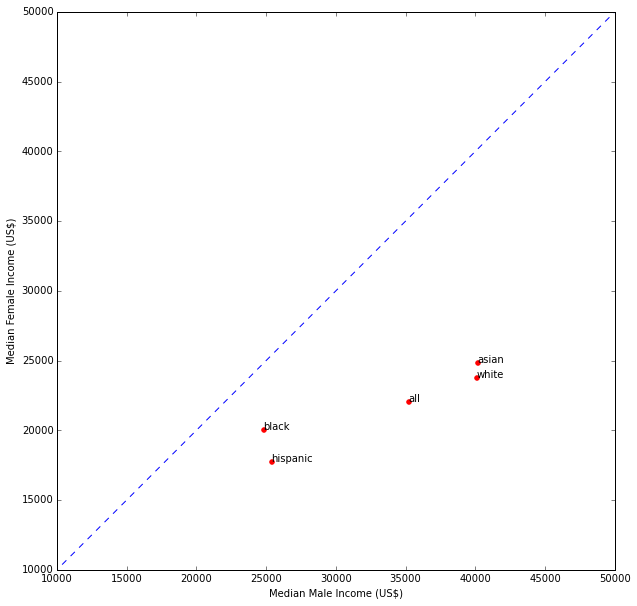

In [37]:
#Placing the medians in the scatter plot

races = ['all', 'white', 'black', 'hispanic', 'asian']
male_inc = []
female_inc = []

for x in races:
    race_inc_male = allmales[x]['Median income'][1]
    male_inc.append(race_inc_male)
    race_inc_female = allfemales[x]['Median income'][1]
    female_inc.append(race_inc_female)
pl.figure(figsize=(10, 10))    
pl.scatter(male_inc, female_inc, color='red')
pl.xlabel('Median Male Income (US$)')
pl.ylabel('Median Female Income (US$)')
pl.plot([0,50000],[0,50000], linestyle='--')
xlim(10000,50000)
ylim(10000,50000)

for label, x, y in zip(races, male_inc, female_inc):
    pl.annotate(label, xy = (x, y))

The graph show the disparity between the income of males vs. females for all social classes in the United States, given all points are situated below the 1x1 line.

In [39]:
poly = np.polyfit(male_inc, female_inc, 1)
print poly

[  3.53140683e-01   9.98984441e+03]


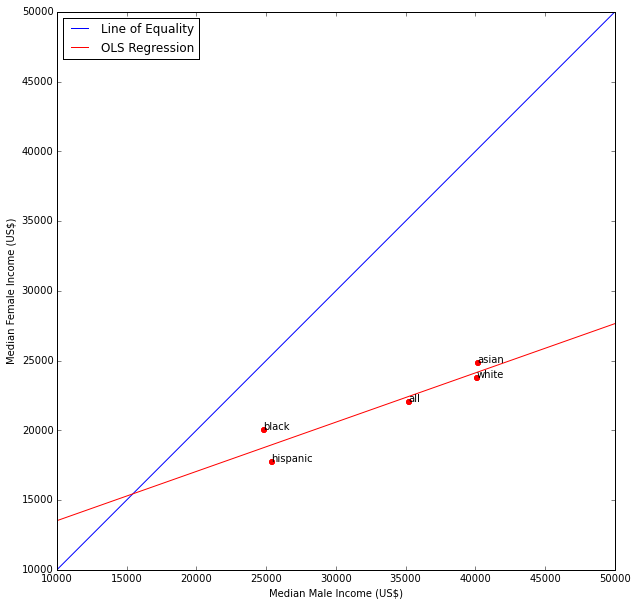

In [42]:
#Fitting it with a line

for x in races:
    race_inc_male = allmales[x]['Median income'][1]
    male_inc.append(race_inc_male)
    race_inc_female = allfemales[x]['Median income'][1]
    female_inc.append(race_inc_female)
pl.figure(figsize=(10, 10))    
pl.scatter(male_inc, female_inc, color='red')
pl.xlabel('Median Male Income (US$)')
pl.ylabel('Median Female Income (US$)')
pl.plot([0,50000],[0,50000], linestyle='-')
XLR = arange(0, 50000, 1)
YLR = poly[0]*XLR+poly[1]
pl.plot(XLR, YLR, 'red')
xlim(10000,50000)
ylim(10000,50000)

for label, x, y in zip(races, male_inc, female_inc):
    pl.annotate(label, xy = (x, y))
    
blueL = mlines.Line2D([], [], color='blue',  label='Line of Equality')
redL = mlines.Line2D([], [], color='red',  label='OLS Regression')
pl.legend(handles=[blueL, redL], loc = 2)

In [29]:
#Performing analytical solution

cor = scipy.stats.spearmanr(female_inc, male_inc)
beta1 = cor[0]*np.std(female_inc)/np.std(male_inc)
beta2 = np.mean(female_inc)-(beta1*np.mean(male_inc))

print beta1
print beta2

0.338176888526
10485.9510732


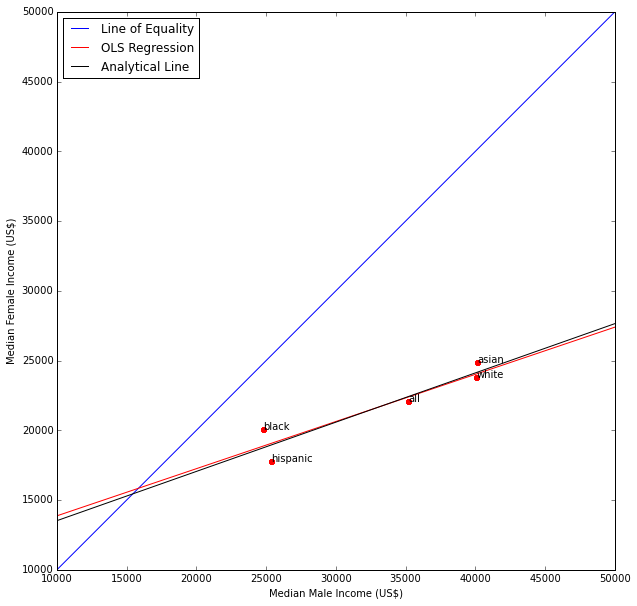

In [52]:
for x in races:
    race_inc_male = allmales[x]['Median income'][1]
    male_inc.append(race_inc_male)
    race_inc_female = allfemales[x]['Median income'][1]
    female_inc.append(race_inc_female)
pl.figure(figsize=(10, 10))    
pl.scatter(male_inc, female_inc, color='red')
pl.xlabel('Median Male Income (US$)')
pl.ylabel('Median Female Income (US$)')
pl.plot([0,50000],[0,50000], linestyle='-')
XLR1 = arange(0, 50000, 1)
YLR1 = beta1*XLR1+beta2
pl.plot(XLR1, YLR1, 'red')
XLR2 = arange(0, 50000, 1)
YLR2 = poly[0]*XLR2+poly[1]
pl.plot(XLR2, YLR2, 'black')

xlim(10000,50000)
ylim(10000,50000)

for label, x, y in zip(races, male_inc, female_inc):
    pl.annotate(label, xy = (x, y))
    
blueL = mlines.Line2D([], [], color='blue',  label='Line of Equality')
redL = mlines.Line2D([], [], color='red',  label='OLS Regression')
blackL = mlines.Line2D([], [], color='black',  label='Analytical Line')
pl.legend(handles=[blueL, redL, blackL], loc = 2)

In [47]:
#Creating masked arrays

all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())
all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [51]:
#Including best fit for OLS of all incomes

poly2 = np.polyfit(~np.isnan(all_males), ~np.isnan(all_females), 1)
print poly2

[ 0.84364534  0.12903226]


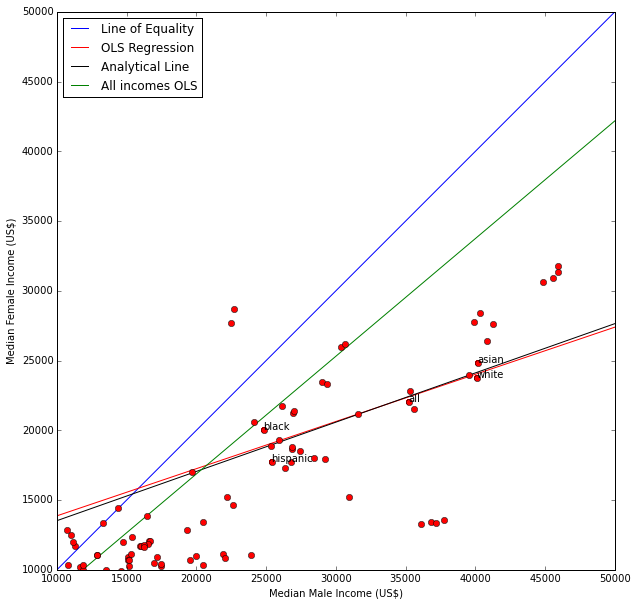

In [65]:
for x in races:
    race_inc_male = allmales[x]['Median income'][1]
    male_inc.append(race_inc_male)
    race_inc_female = allfemales[x]['Median income'][1]
    female_inc.append(race_inc_female)
pl.figure(figsize=(10, 10))    
pl.scatter(male_inc, female_inc, color='red')
pl.xlabel('Median Male Income (US$)')
pl.ylabel('Median Female Income (US$)')
pl.plot([0,50000],[0,50000], linestyle='-')
XLR1 = arange(0, 50000, 1)
YLR1 = beta1*XLR1+beta2
pl.plot(XLR1, YLR1, 'red')
XLR2 = arange(0, 50000, 1)
YLR2 = poly[0]*XLR2+poly[1]
pl.plot(XLR2, YLR2, 'black')
XLR3 = arange(0, 50000, 1)
YLR3 = poly2[0]*XLR3+poly2[1]
pl.plot(XLR3, YLR3, 'green')
pl.plot(all_males, all_females, 'ro')

xlim(10000,50000)
ylim(10000,50000)

for label, x, y in zip(races, male_inc, female_inc):
    pl.annotate(label, xy = (x, y))
    
blueL = mlines.Line2D([], [], color='blue',  label='Line of Equality')
redL = mlines.Line2D([], [], color='red',  label='OLS Regression')
blackL = mlines.Line2D([], [], color='black',  label='Analytical Line')
greenL = mlines.Line2D([], [], color='green',  label='All incomes OLS')
pl.legend(handles=[blueL, redL, blackL, greenL], loc = 2)

The line fit for the OLS of all incomes is not similar, although it reaches a close value for the black population.

#Now pick a stipend, maybe your ideal stipend and predict what a woman in a position where a man recieves your ideal stipend would make
#lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

Based on the OLS for all incomes, an income of USD 200k would correspond to an income of approximately USD 169k for a woman.

In [66]:
poly2[0]*200000+poly2[1]

168729.19654503791

Regarding race, we can definitely see that asians and whites tend to earn more than blacks and latinos. However, gender income inequality within blacks and latinos tend to be lower than for asians and whites.